In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.data = {}

    def get_data(self, script):
        self.fetch_intraday_data(script)
        self.convert_intraday_data(script)
        return self.__getitem__(script)

    def fetch_intraday_data(self, script):
        ts = TimeSeries(key=self.api_key)
        try:
            data, _ = ts.get_intraday(symbol=script)
            self.data[script] = data
        except ValueError as ve:
            print(f"Failed to fetch data for {script}: {ve}")

    def convert_intraday_data(self, script):
        if script not in self.data:
            print(f"Data not available for {script}")
            return

        data = self.data[script]
        df = pd.DataFrame.from_dict(data, orient='index', dtype=float)
        df.index = pd.to_datetime(df.index)
        df["timestamp"] = df.index
        df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"}, inplace=True)
        df = df.astype({"open": float, "high": float, "low": float, "close": float, "volume": int})
        self.data[script] = {"df": df}
        return df

    def __getitem__(self, script):
        if script not in self.data:
            print(f"Data not available for {script}")
            return
        return self.data[script]["df"]

    def __setitem__(self, script, df):
        self.data[script] = {"df": df}

    def __contains__(self, script):
        return script in self.data


In [3]:
api_key = "8Q7PGY4MNL4PSFX9"
script_data = ScriptData(api_key)
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,open,high,low,close,volume,timestamp
2023-02-15 20:00:00,97.0000,97.1200,97.000,97.1000,23421,2023-02-15 20:00:00
2023-02-15 19:45:00,96.9399,97.0000,96.900,96.9800,24896,2023-02-15 19:45:00
2023-02-15 19:30:00,97.0000,97.0100,96.910,96.9400,12484,2023-02-15 19:30:00
2023-02-15 19:15:00,96.9300,97.0100,96.800,97.0000,23284,2023-02-15 19:15:00
2023-02-15 19:00:00,96.9800,97.0000,96.930,96.9400,17077,2023-02-15 19:00:00
...,...,...,...,...,...,...
2023-02-14 12:15:00,92.6600,93.0399,92.530,93.0350,1306004,2023-02-14 12:15:00
2023-02-14 12:00:00,92.3300,92.7300,92.270,92.6607,1437391,2023-02-14 12:00:00
2023-02-14 11:45:00,92.7400,92.7400,92.260,92.3531,1869190,2023-02-14 11:45:00
2023-02-14 11:30:00,93.1400,93.2500,92.695,92.7300,1506119,2023-02-14 11:30:00


In [4]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,open,high,low,close,volume,timestamp
2023-02-15 20:00:00,155.4399,155.510,155.4399,155.4800,17287,2023-02-15 20:00:00
2023-02-15 19:45:00,155.4600,155.500,155.4000,155.4000,19333,2023-02-15 19:45:00
2023-02-15 19:30:00,155.4800,155.490,155.4400,155.4700,9288,2023-02-15 19:30:00
2023-02-15 19:15:00,155.3100,155.500,155.3000,155.4800,18221,2023-02-15 19:15:00
2023-02-15 19:00:00,155.3900,155.390,155.3200,155.3300,7452,2023-02-15 19:00:00
...,...,...,...,...,...,...
2023-02-14 12:15:00,151.6950,152.120,151.5700,151.9700,1337676,2023-02-14 12:15:00
2023-02-14 12:00:00,151.1300,151.830,151.1000,151.7000,1509483,2023-02-14 12:00:00
2023-02-14 11:45:00,151.5500,152.030,151.0400,151.1400,2000947,2023-02-14 11:45:00
2023-02-14 11:30:00,152.0300,152.590,151.4400,151.5418,1951865,2023-02-14 11:30:00


In [5]:
'GOOGL' in script_data

True

In [6]:
'AAPL' in script_data

True

In [7]:
'NVDA' in script_data

False

In [8]:
def indicator1(df, timeperiod):
    df['indicator'] = df['close'].rolling(timeperiod).mean()
    return df[['timestamp', 'indicator']]

In [9]:
indicator1(script_data['GOOGL'],timeperiod=5)

,timestamp,indicator
2023-02-15 20:00:00,2023-02-15 20:00:00,NaN
2023-02-15 19:45:00,2023-02-15 19:45:00,NaN
2023-02-15 19:30:00,2023-02-15 19:30:00,NaN
2023-02-15 19:15:00,2023-02-15 19:15:00,NaN
2023-02-15 19:00:00,2023-02-15 19:00:00,96.99200
...,...,...
2023-02-14 12:15:00,2023-02-14 12:15:00,93.27226
2023-02-14 12:00:00,2023-02-14 12:00:00,93.05054
2023-02-14 11:45:00,2023-02-14 11:45:00,92.87866
2023-02-14 11:30:00,2023-02-14 11:30:00,92.76234


In [10]:
indicator1(script_data['AAPL'],timeperiod=5)

,timestamp,indicator
2023-02-15 20:00:00,2023-02-15 20:00:00,NaN
2023-02-15 19:45:00,2023-02-15 19:45:00,NaN
2023-02-15 19:30:00,2023-02-15 19:30:00,NaN
2023-02-15 19:15:00,2023-02-15 19:15:00,NaN
2023-02-15 19:00:00,2023-02-15 19:00:00,155.43200
...,...,...
2023-02-14 12:15:00,2023-02-14 12:15:00,152.13704
2023-02-14 12:00:00,2023-02-14 12:00:00,151.92404
2023-02-14 11:45:00,2023-02-14 11:45:00,151.73104
2023-02-14 11:30:00,2023-02-14 11:30:00,151.64834


In [11]:
# pip install mplfinance

In [12]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

class Strategy:
    def __init__(self, api_key):
        self.api_key = api_key
    
    def generate_signals(self, script):
        # Fetch intraday historical data using ScriptData class
        sd = ScriptData(self.api_key)
        sd.fetch_intraday_data(script)
        df = sd.convert_intraday_data(script)
        close_data = df['close']
        
        # Compute indicator data on 'close' of 'df' using indicator1 function
        indicator_data = indicator1(df, 5)['indicator']
        
        # Generate signals DataFrame
        signals = pd.DataFrame({'timestamp': df['timestamp'], 'signal': 'NO_SIGNAL'})
        signals.loc[indicator_data > close_data, 'signal'] = 'BUY'
        signals.loc[indicator_data < close_data, 'signal'] = 'SELL'
        
        # Print signals DataFrame
        buy_sell_signals = signals[(signals['signal'] == 'BUY') | (signals['signal'] == 'SELL')]
        print(pd.DataFrame(buy_sell_signals))
        
        # Plot candlestick chart of 'df' and 'indicator'
        ohlc = df[['timestamp', 'open', 'high', 'low', 'close']]
        ohlc['timestamp'] = pd.to_datetime(ohlc['timestamp'])
        ohlc['timestamp'] = ohlc['timestamp'].apply(mdates.date2num)
        fig, ax = plt.subplots(figsize=(20,10))
        candlestick_ohlc(ax, ohlc.values, width=0.0005, colorup='g', colordown='r')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.plot(df['timestamp'], indicator_data, color='grey')
        plt.show()

    def get_script_data(self, script):
        # Fetch intraday historical data using ScriptData class
        sd = ScriptData(self.api_key)
        sd.fetch_intraday_data(script)
        df = sd.convert_intraday_data(script)
        return df


C:\Users\Satyam\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [13]:
strategy= Strategy('NVDA')

In [14]:
strategy.get_script_data('NVDA')

,open,high,low,close,volume,timestamp
2023-02-15 20:00:00,227.890,228.2200,227.890,228.1400,13194,2023-02-15 20:00:00
2023-02-15 19:45:00,228.080,228.1000,227.810,227.8700,8839,2023-02-15 19:45:00
2023-02-15 19:30:00,228.240,228.2400,228.060,228.1900,5122,2023-02-15 19:30:00
2023-02-15 19:15:00,227.850,228.2500,227.700,228.2400,18302,2023-02-15 19:15:00
2023-02-15 19:00:00,227.420,227.7500,227.420,227.6300,4434,2023-02-15 19:00:00
...,...,...,...,...,...,...
2023-02-14 12:00:00,223.190,224.9400,222.835,224.6562,1746576,2023-02-14 12:00:00
2023-02-14 11:45:00,224.355,224.6500,215.730,223.1900,2198268,2023-02-14 11:45:00
2023-02-14 11:30:00,225.500,226.7100,224.170,224.3332,2186078,2023-02-14 11:30:00
2023-02-14 11:15:00,223.750,226.1342,223.550,225.5300,2611006,2023-02-14 11:15:00


                              timestamp signal
2023-02-15 19:00:00 2023-02-15 19:00:00    BUY
2023-02-15 18:45:00 2023-02-15 18:45:00    BUY
2023-02-15 18:30:00 2023-02-15 18:30:00    BUY
2023-02-15 18:15:00 2023-02-15 18:15:00    BUY
2023-02-15 18:00:00 2023-02-15 18:00:00    BUY
...                                 ...    ...
2023-02-14 12:00:00 2023-02-14 12:00:00    BUY
2023-02-14 11:45:00 2023-02-14 11:45:00    BUY
2023-02-14 11:30:00 2023-02-14 11:30:00    BUY
2023-02-14 11:15:00 2023-02-14 11:15:00   SELL
2023-02-14 11:00:00 2023-02-14 11:00:00    BUY

[96 rows x 2 columns]


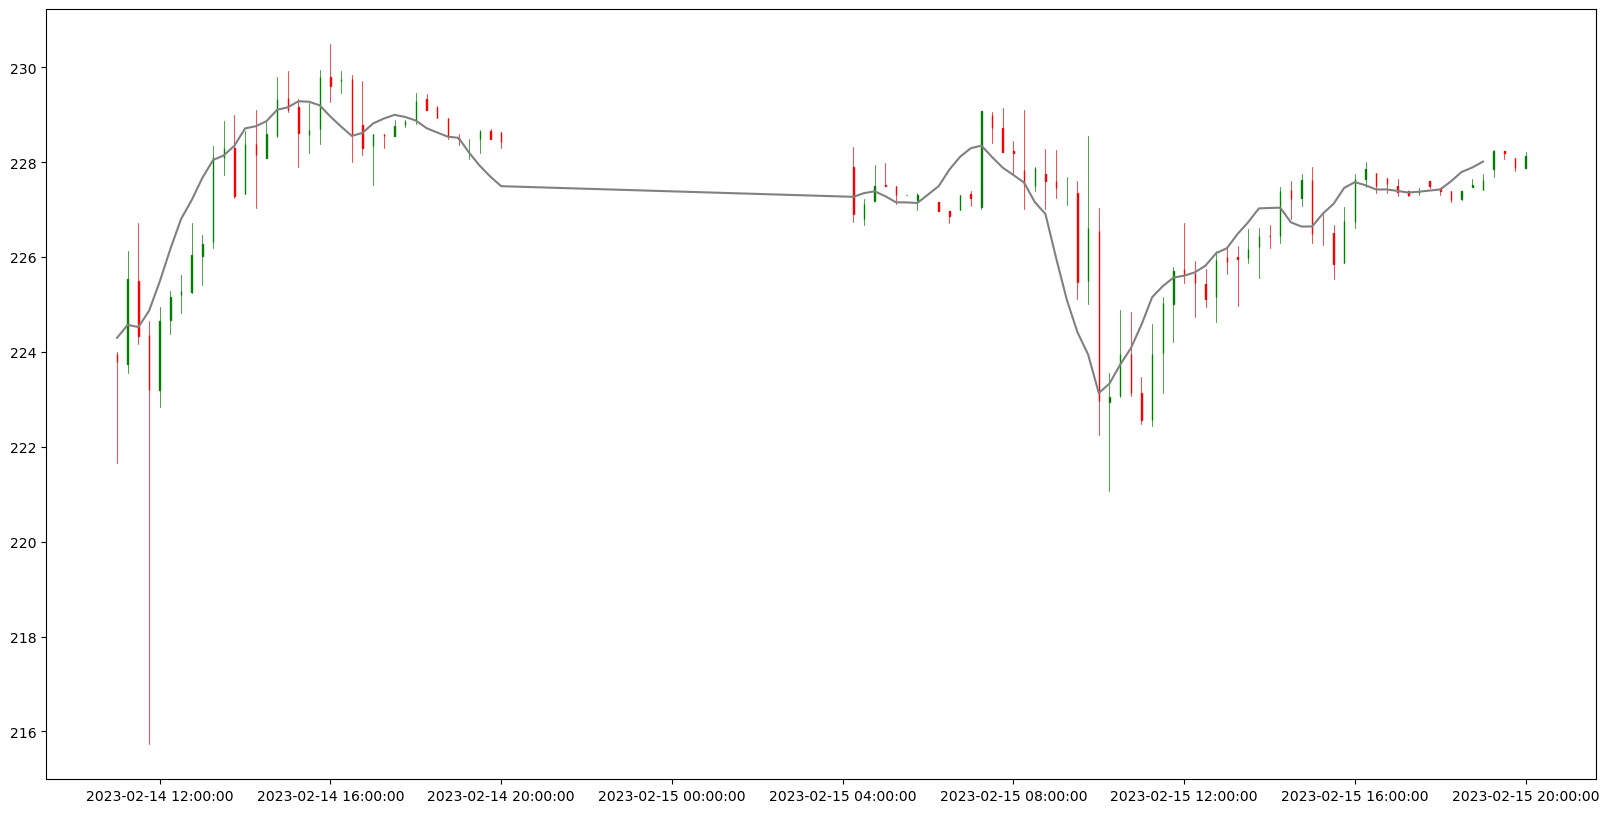

In [15]:
strategy.generate_signals('NVDA')